1. Dataset Exploration

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Feature Creation

-New feature FamilySize

In [ ]:
df['FamilySize'] = df['SibSp']+df['Parch']

In [ ]:
df[df['Parch'] ==4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.900,NaN,S,5
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.900,NaN,S,5
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S,5
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,4


-New Feature isAlone

In [ ]:
df['isAlone'] = df.apply(lambda x: 1 if x['SibSp']==0 and x['Parch'] ==0 else 0,axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


3. Feature Transformation

- Fare feature to categorical variables(low, medium, high)

In [ ]:
maximum_fare = df['Fare'].max()

In [ ]:
df['Label'] = pd.cut(x=df['Fare'],bins=[0,50,100,512.3292],labels=['low','medium','high'])

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,Label
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0,1,low
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,1,low
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3,0,low
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,1,low
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0,1,low


- Title from name feature

In [ ]:
df['Name'].str.split(' ')[0][1]

'Mr.'

In [ ]:
df['Title'] = df['Name'].apply(lambda x: x.split(' ')[1])

In [ ]:
df['Title']

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Title, Length: 891, dtype: object

4. Handling missing values

- missing values in age col filled with its median age

In [ ]:
df['Age'].median()

28.0

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12476\1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  FamilySize   891 non-null    int64   
 13  isAlone      891 non-null    int64   
 14  Label        876 non-null    category
 15  Title        891 non-null    object  
dtypes: category(1), float64(2), int64(7), object(6)
memory usage: 105.5+ KB


- embarked col missing values filled with frequent values

In [ ]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12476\3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  FamilySize   891 non-null    int64   
 13  isAlone      891 non-null    int64   
 14  Label        876 non-null    category
 15  Title        891 non-null    object  
dtypes: category(1), float64(2), int64(7), object(6)
memory usage: 105.5+ KB


In [ ]:
df['Embarked'].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  FamilySize   891 non-null    int64   
 13  isAlone      891 non-null    int64   
 14  Label        876 non-null    category
 15  Title        891 non-null    object  
dtypes: category(1), float64(2), int64(7), object(6)
memory usage: 105.5+ KB


In [ ]:
df= df.drop(['Name','SibSp','Parch','Ticket','Cabin'],axis=1)

In [ ]:
df['Title'].value_counts()

Title
Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title','Label'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,isAlone,Sex_female,Sex_male,Embarked_C,...,"Title_Shawah,","Title_Steen,","Title_Velde,","Title_Walle,",Title_der,Title_the,Title_y,Label_low,Label_medium,Label_high
0,1,0,3,22.0,7.2500,1,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,2,1,1,38.0,71.2833,1,0,True,False,True,...,False,False,False,False,False,False,False,False,True,False
2,3,1,3,26.0,7.9250,0,1,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,1,1,35.0,53.1000,1,0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,5,0,3,35.0,8.0500,0,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Age                 891 non-null    float64
 4   Fare                891 non-null    float64
 5   FamilySize          891 non-null    int64  
 6   isAlone             891 non-null    int64  
 7   Sex_female          891 non-null    bool   
 8   Sex_male            891 non-null    bool   
 9   Embarked_C          891 non-null    bool   
 10  Embarked_Q          891 non-null    bool   
 11  Embarked_S          891 non-null    bool   
 12  Title_Billiard,     891 non-null    bool   
 13  Title_Capt.         891 non-null    bool   
 14  Title_Carlo,        891 non-null    bool   
 15  Title_Col.          891 non-null    bool   
 16  Title_Cr

In [ ]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [ ]:
y.shape

(891,)

5. Model training and evaluation

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(xtrain,ytrain)

d:\Machine Learning\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

accuracy = accuracy_score(ytest,y_pred)
print('Accuracy: ',accuracy)

cm = confusion_matrix(ytest,y_pred)
print('Confusion Matrix: ',cm)

f1score = f1_score(ytest,y_pred)
print('F1 score: ',f1score)

recall = recall_score(ytest,y_pred)
print('Recall: ',recall)

p = precision_score(ytest,y_pred)
print('Precision Score: ',p)

Accuracy:  0.8044692737430168
Confusion Matrix:  [[88 17]
 [18 56]]
F1 score:  0.7619047619047619
Recall:  0.7567567567567568
Precision Score:  0.7671232876712328


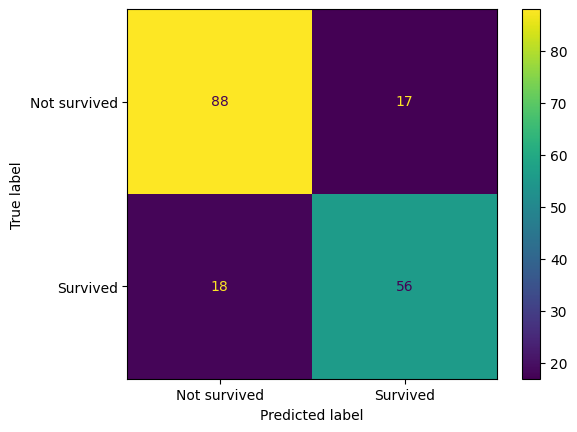

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not survived', 'Survived'])

cm_display.plot()
plt.show()